In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv("loan_borowwer_data.csv")
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

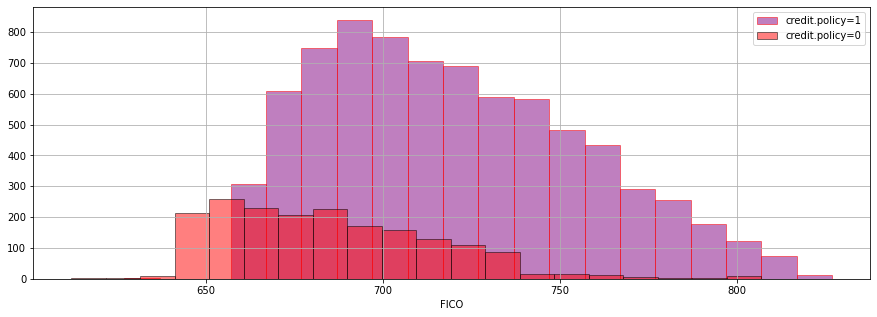

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='PURPLE',bins=20,edgecolor='red',label='credit.policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=20,edgecolor='black',label='credit.policy=0')
plt.legend()
plt.xlabel('FICO')
plt.show()

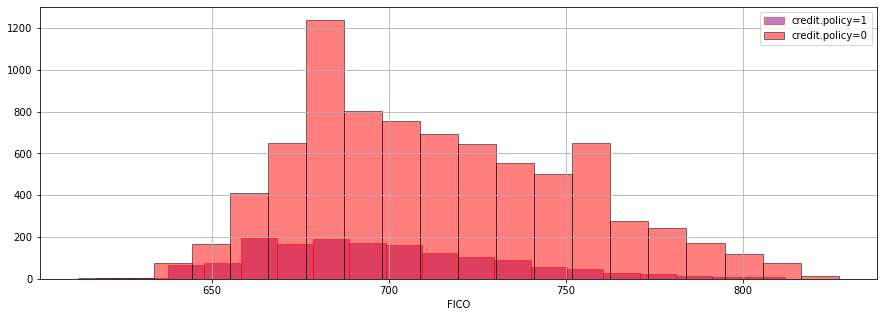

In [25]:
plt.figure(figsize=(15,5))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='PURPLE',bins=20,edgecolor='red',label='credit.policy=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=20,edgecolor='black',label='credit.policy=0')
plt.legend()
plt.xlabel('FICO')
plt.show()

In [26]:
df.rename(columns={'not.fully.paid':'not_fully_paid'},inplace=True)
df

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not_fully_paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

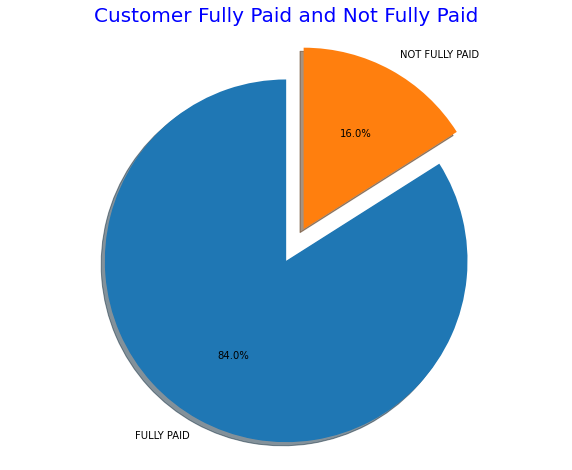

In [50]:
labels = 'FULLY PAID','NOT FULLY PAID'
sizes = [df.not_fully_paid[df['not_fully_paid']==0].count(),df.not_fully_paid[df['not_fully_paid']==1].count()]
explode1=(0,0.2)
fig1,ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes,explode=explode1,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
plt.title('Customer Fully Paid and Not Fully Paid',fontsize=20,color='blue')
plt.show()

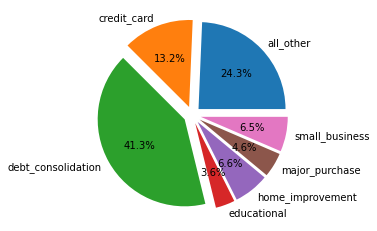

In [54]:
labels = df['purpose'].astype('category').cat.categories.tolist()
counts = df['purpose'].value_counts()
explode2=(0.1,0.1,0.1,0.1,0.1,0.1,0.1)
sizes = [counts[var_cat] for var_cat in labels]
fig1,ax1 = plt.subplots()
ax1.pie(sizes,explode=explode2,labels=labels,autopct='%1.1f%%')
plt.show()